In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [ ]:
#define state
class BMIState(TypedDict):
    weight_kg: float
    height_kg: float
    bmi: float
    category: str

In [14]:
def calculate_bmi(state: BMIState)-> BMIState:
    weight = state["weight_kg"]
    height = state["height_kg"]

    bmi = weight/(height**2)

    state["bmi"] = round(bmi,2)

    return state


In [23]:
def Label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state



In [24]:
#define graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node("Label_bmi",Label_bmi)
#add edges to the graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','Label_bmi')
graph.add_edge('Label_bmi',END)
# compile the graph
workflow = graph.compile()



In [25]:
#execute the graph
initial_state = {'weight_kg':80, 'height_kg':1.73}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_kg': 1.73, 'bmi': 26.73}


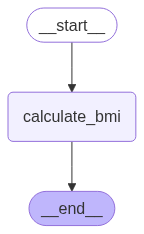

In [22]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())